In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Boston_Housing_Dataset.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
x=df.drop('MEDV',axis=1).values 
y=df['MEDV'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(404, 13)

In [9]:
x_test.shape

(102, 13)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(
    random_state=42,
    max_depth=4,
    min_samples_split=4,
    min_samples_leaf=2
)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                      random_state=42)

In [12]:
y_pred=tree_reg.predict(x_test)

In [14]:
from sklearn.metrics import(
    mean_squared_error,
    r2_score,
    mean_absolute_error
)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse",mse)
print("rmse:",rmse)
print("mae:",mae)
print("r2:",r2)

mse 20.778420101646347
rmse: 4.5583352335744625
mae: 2.982525119237921
r2: 0.7166596457158035


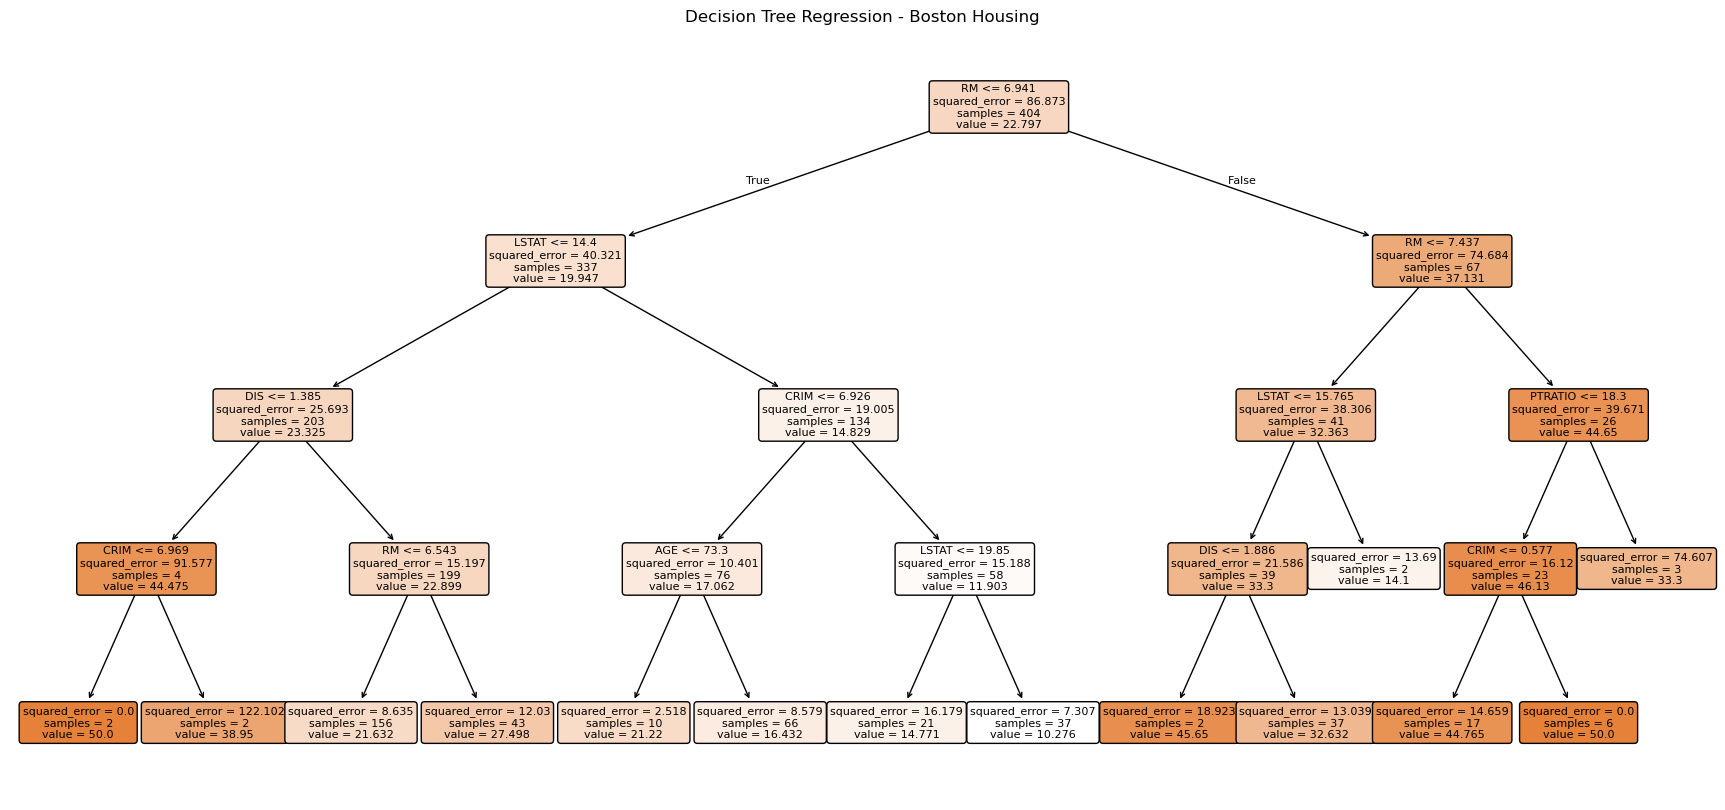

In [15]:
from sklearn import tree
feature_names = df.drop("MEDV", axis=1).columns

# Plot the decision tree
plt.figure(figsize=(22, 10))  # make it big so text is readable
tree.plot_tree(
    tree_reg,
    feature_names=feature_names,
    filled=True,       # color nodes by value
    rounded=True,      # rounded boxes
    fontsize=8
)
plt.title("Decision Tree Regression - Boston Housing")
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10, None],
    "min_samples_split": [2, 4, 6, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6, 10],
    "max_leaf_nodes": [None, 5, 10, 20, 30]
}

# ------------------------------
# 4. GridSearchCV setup
# ------------------------------
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

# ------------------------------
# 5. Fit GridSearchCV
# ------------------------------
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

# ------------------------------
# 6. Evaluate best model on test data
# ------------------------------
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)

print("\n--- Test Set Performance ---")
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation R²: 0.7433436099286463

--- Test Set Performance ---
MSE : 16.44747190945569
RMSE: 4.0555482871562125
R²  : 0.7757176678925989


In [20]:
tree_reg=DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=10
)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, random_state=42)

In [21]:
y_pred=tree_reg.predict(x_test)

In [22]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse",mse)
print("rmse:",rmse)
print("mae:",mae)
print("r2:",r2)

mse 16.44747190945569
rmse: 4.0555482871562125
mae: 2.7616089796277317
r2: 0.7757176678925989


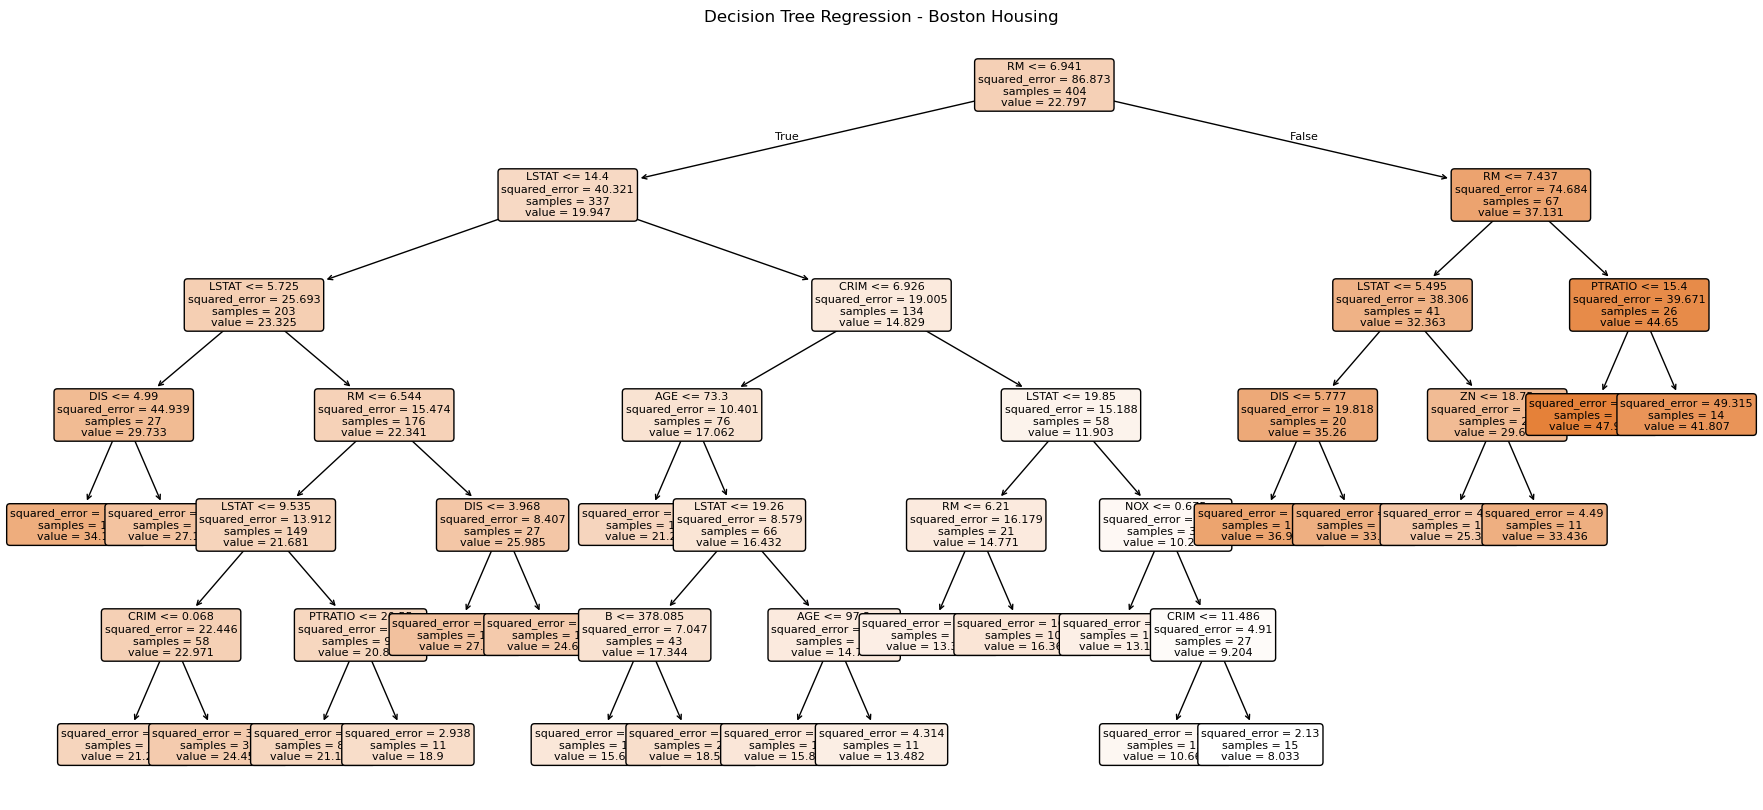

In [23]:
feature_names = df.drop("MEDV", axis=1).columns

# Plot the decision tree
plt.figure(figsize=(22, 10))  # make it big so text is readable
tree.plot_tree(
    tree_reg,
    feature_names=feature_names,
    filled=True,       # color nodes by value
    rounded=True,      # rounded boxes
    fontsize=8
)
plt.title("Decision Tree Regression - Boston Housing")
plt.show()

In [25]:
best_model = grid.best_estimator_
# Predict on test data
y_pred = best_model.predict(x_test)

# Compare actual vs predicted
import pandas as pd
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print(results.head(10))


   Actual  Predicted
0    23.6  24.454839
1    32.4  34.170000
2    13.6  18.568000
3    22.8  27.123529
4    16.1  18.568000
5    20.0  21.128750
6    17.8  18.568000
7    14.0  15.866667
8    19.6  21.128750
9    16.8  21.128750


In [26]:
new_house = np.array([[ 
    0.2,     # CRIM
    18.0,    # ZN
    5.0,     # INDUS
    0,       # CHAS
    0.45,    # NOX
    6.8,     # RM
    65.0,    # AGE
    4.2,     # DIS
    3,       # RAD
    300,     # TAX
    16.5,    # PTRATIO
    380.0,   # B
    5.5      # LSTAT
]])

predicted_value = best_model.predict(new_house)
print("Predicted MEDV:", predicted_value[0])

Predicted MEDV: 34.17
